### Problem Statement
[insert]


### Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://data.ny.gov/Transportation/Turnstile-Usage-Data-2016/ekwu-khcy
# https://data.ny.gov/api/views/ekwu-khcy/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('Turnstile_Usage_Data__2016.csv')
data = pd.DataFrame(data)
print(data.shape)
# parse spaces from columns
data=data.rename(columns = {'Exits                                                     ':'Exits'})
print(data.columns)
# remove first few columns, deemed irrelevant
data = data.iloc[9000000:,3:]
print(data.shape)
print(type(data))
data.head()

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9492670, 11)
Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits'],
      dtype='object')
(492670, 8)
<class 'pandas.core.frame.DataFrame'>


,Station,Line Name,Division,Date,Time,Description,Entries,Exits
9000000,75 AV,EF,IND,12/03/2016,03:00:00,REGULAR,714833,200563
9000001,75 AV,EF,IND,12/03/2016,07:00:00,REGULAR,714833,200565
9000002,75 AV,EF,IND,12/03/2016,11:00:00,REGULAR,714845,200566
9000003,75 AV,EF,IND,12/03/2016,15:00:00,REGULAR,714858,200570
9000004,75 AV,EF,IND,12/03/2016,19:00:00,REGULAR,714879,200579


In [3]:
data.describe()

,Entries,Exits
count,4.926700e+05,4.926700e+05
mean,3.535047e+07,2.842956e+07
std,1.941804e+08,1.750312e+08
min,0.000000e+00,0.000000e+00
25%,5.409530e+05,2.761155e+05
50%,2.620731e+06,1.527126e+06
75%,6.681166e+06,4.723947e+06
max,2.114946e+09,2.087387e+09


### Process Data

In [4]:
# Data presented as cumulative; add columns to track the increment
# Add Traffic_Tot column as sum of Entry and Exit to represent activity
data['Entry_Inc'] = abs(data.Entries.diff())
data['Exits_Inc'] = abs(data.Exits.diff())
data['Traffic_Tot'] = np.add(data.Entry_Inc, data.Exits_Inc)
data.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
9000000,75 AV,EF,IND,12/03/2016,03:00:00,REGULAR,714833,200563,NaN,NaN,NaN
9000001,75 AV,EF,IND,12/03/2016,07:00:00,REGULAR,714833,200565,0.0,2.0,2.0
9000002,75 AV,EF,IND,12/03/2016,11:00:00,REGULAR,714845,200566,12.0,1.0,13.0
9000003,75 AV,EF,IND,12/03/2016,15:00:00,REGULAR,714858,200570,13.0,4.0,17.0
9000004,75 AV,EF,IND,12/03/2016,19:00:00,REGULAR,714879,200579,21.0,9.0,30.0


In [5]:
# filter outliers above specified quantile
quant_filt = 0.99
q = data["Entry_Inc"].quantile(quant_filt)
data = data[data["Entry_Inc"] < q]

r = data["Exits_Inc"].quantile(quant_filt)
data = data[data["Exits_Inc"] < r]

s = data["Traffic_Tot"].quantile(quant_filt)
data = data[data["Traffic_Tot"] < s]


print(data.shape)
data = data.dropna()
print(data.shape) # apparently no issues with NaN cells

data.head()

(478035, 11)
(478035, 11)


,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
9000001,75 AV,EF,IND,12/03/2016,07:00:00,REGULAR,714833,200565,0.0,2.0,2.0
9000002,75 AV,EF,IND,12/03/2016,11:00:00,REGULAR,714845,200566,12.0,1.0,13.0
9000003,75 AV,EF,IND,12/03/2016,15:00:00,REGULAR,714858,200570,13.0,4.0,17.0
9000004,75 AV,EF,IND,12/03/2016,19:00:00,REGULAR,714879,200579,21.0,9.0,30.0
9000005,75 AV,EF,IND,12/03/2016,23:00:00,REGULAR,714890,200584,11.0,5.0,16.0


In [6]:
data.describe()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
count,4.780350e+05,4.780350e+05,478035.00000,478035.000000,478035.000000
mean,3.510479e+07,2.819736e+07,168.02887,126.397584,294.426454
std,1.933766e+08,1.740968e+08,235.55161,199.961625,354.566815
min,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
25%,5.338005e+05,2.695600e+05,12.00000,9.000000,35.000000
50%,2.608956e+06,1.511804e+06,73.00000,49.000000,161.000000
75%,6.645366e+06,4.683332e+06,232.00000,155.000000,428.000000
max,2.114946e+09,2.087387e+09,1993.00000,1995.000000,2005.000000


In [7]:
print(data['Entry_Inc'].describe(), data['Exits_Inc'].describe())

count    478035.00000
mean        168.02887
std         235.55161
min           0.00000
25%          12.00000
50%          73.00000
75%         232.00000
max        1993.00000
Name: Entry_Inc, dtype: float64 count    478035.000000
mean        126.397584
std         199.961625
min           0.000000
25%           9.000000
50%          49.000000
75%         155.000000
max        1995.000000
Name: Exits_Inc, dtype: float64


### Sort Data
Data is sorted by Station.

In [8]:
data_stndatetime = data.groupby([ "Station", "Date",'Time']).sum()
data_stndatetime.head()

Entries       Exits  Entry_Inc  Exits_Inc  \
Station Date       Time                                                     
1 AV    12/17/2016 07:00:00  1414570809  1467668254      530.0      637.0   
                   11:00:00  1414572780  1467670839     1971.0     2585.0   
                   15:00:00  1414576771  1467674733     3991.0     3894.0   
                   19:00:00  1414581693  1467680117     4922.0     5384.0   
                   23:00:00  1414586042  1467685043     4349.0     4926.0   

                             Traffic_Tot  
Station Date       Time                   
1 AV    12/17/2016 07:00:00       1167.0  
                   11:00:00       4556.0  
                   15:00:00       7885.0  
                   19:00:00      10306.0  
                   23:00:00       9275.0

In [9]:
data_stn = data.groupby([ "Station"]).sum()
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
Station,,,,,
1 AV,115841352864,120206188440,219030.0,244478.0,463508.0
103 ST,18377930041,71115701540,552885.0,361583.0,914468.0
103 ST-CORONA,8342687703,7841821142,369799.0,269522.0,639321.0
104 ST,408471880320,416058234080,47481.0,22292.0,69773.0
110 ST,3647944452,3677558758,219265.0,163845.0,383110.0


In [10]:
data_stn = pd.DataFrame(data_stn)
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
Station,,,,,
1 AV,115841352864,120206188440,219030.0,244478.0,463508.0
103 ST,18377930041,71115701540,552885.0,361583.0,914468.0
103 ST-CORONA,8342687703,7841821142,369799.0,269522.0,639321.0
104 ST,408471880320,416058234080,47481.0,22292.0,69773.0
110 ST,3647944452,3677558758,219265.0,163845.0,383110.0


In [11]:
data_stn['Station_ID'] = data_stn.index
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Station,,,,,,
1 AV,115841352864,120206188440,219030.0,244478.0,463508.0,1 AV
103 ST,18377930041,71115701540,552885.0,361583.0,914468.0,103 ST
103 ST-CORONA,8342687703,7841821142,369799.0,269522.0,639321.0,103 ST-CORONA
104 ST,408471880320,416058234080,47481.0,22292.0,69773.0,104 ST
110 ST,3647944452,3677558758,219265.0,163845.0,383110.0,110 ST


In [12]:
data_stn = data_stn.sort_values(['Traffic_Tot'], ascending=[False])
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Station,,,,,,
34 ST-PENN STA,338585874636,193127225303,2338785.0,1887696.0,4226481.0,34 ST-PENN STA
34 ST-HERALD SQ,294719355670,295124308049,1687751.0,1502624.0,3190375.0,34 ST-HERALD SQ
GRD CNTRL-42 ST,335002570229,87524866189,1654045.0,1414912.0,3068957.0,GRD CNTRL-42 ST
TIMES SQ-42 ST,688576100536,549774082572,1602048.0,1364463.0,2966511.0,TIMES SQ-42 ST
23 ST,774047445317,724270219420,1532079.0,1182771.0,2714850.0,23 ST


In [13]:
data_stn['Idx'] = np.arange(data_stn.shape[0])
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID,Idx
Station,,,,,,,
34 ST-PENN STA,338585874636,193127225303,2338785.0,1887696.0,4226481.0,34 ST-PENN STA,0
34 ST-HERALD SQ,294719355670,295124308049,1687751.0,1502624.0,3190375.0,34 ST-HERALD SQ,1
GRD CNTRL-42 ST,335002570229,87524866189,1654045.0,1414912.0,3068957.0,GRD CNTRL-42 ST,2
TIMES SQ-42 ST,688576100536,549774082572,1602048.0,1364463.0,2966511.0,TIMES SQ-42 ST,3
23 ST,774047445317,724270219420,1532079.0,1182771.0,2714850.0,23 ST,4


In [14]:
data_stn = data_stn.set_index('Idx')
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,338585874636,193127225303,2338785.0,1887696.0,4226481.0,34 ST-PENN STA
1,294719355670,295124308049,1687751.0,1502624.0,3190375.0,34 ST-HERALD SQ
2,335002570229,87524866189,1654045.0,1414912.0,3068957.0,GRD CNTRL-42 ST
3,688576100536,549774082572,1602048.0,1364463.0,2966511.0,TIMES SQ-42 ST
4,774047445317,724270219420,1532079.0,1182771.0,2714850.0,23 ST


In [15]:
# demographic data: NYC census
# map of startups in NYC
# calendar of tech events
# unicorn 

import seaborn as sns
sns.set_style("whitegrid")


In [16]:
data_stn = data_stn.iloc[:20,:] # limit to 20 most active stations
data_stn.head()


,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,338585874636,193127225303,2338785.0,1887696.0,4226481.0,34 ST-PENN STA
1,294719355670,295124308049,1687751.0,1502624.0,3190375.0,34 ST-HERALD SQ
2,335002570229,87524866189,1654045.0,1414912.0,3068957.0,GRD CNTRL-42 ST
3,688576100536,549774082572,1602048.0,1364463.0,2966511.0,TIMES SQ-42 ST
4,774047445317,724270219420,1532079.0,1182771.0,2714850.0,23 ST


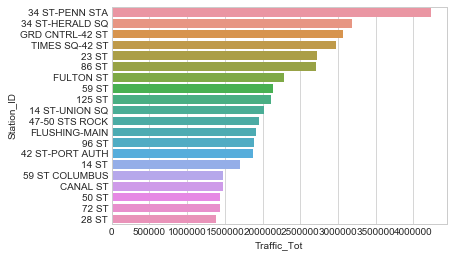

In [17]:
ax = sns.barplot(x="Traffic_Tot", y='Station_ID', data=data_stn)


In [18]:
# PROBLEM STATEMENT
# Optimize utilization of street teams by using data science by utilizing MTA 
# and [Demographic] data

# PRESENTATION
# Executive Summary / Scenario
# MTA findings
# Demographic findings
# Combined MTA/Demo Analysis
# Conclusion
# Q&A

# TODO:
# Map which includes demographic data (ie income) and station activity (by size of dot)
# Analyze top stations by time period (season, month, week, day, hour)
# add lat/long
# vet data better / graph 

### Import Data

### Cleaning Data

### Station Traffic

### Top Station Activity

In [19]:
data_23ST = data[data['Station'] == '23 ST']
data_23ST = data_23ST.dropna()
data_23ST.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
9011580,23 ST,FM,IND,12/03/2016,07:00:00,REGULAR,236787169,455911474,14.0,37.0,51.0
9011581,23 ST,FM,IND,12/03/2016,11:00:00,REGULAR,236787224,455911787,55.0,313.0,368.0
9011582,23 ST,FM,IND,12/03/2016,15:00:00,REGULAR,236787488,455912182,264.0,395.0,659.0
9011583,23 ST,FM,IND,12/03/2016,19:00:00,REGULAR,236787614,455912398,126.0,216.0,342.0
9011584,23 ST,FM,IND,12/03/2016,23:00:00,REGULAR,236787860,455912635,246.0,237.0,483.0


/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


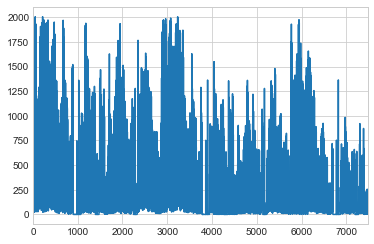

In [20]:
ax = sns.tsplot(data_23ST['Traffic_Tot'])

In [21]:
data_23ST['Traffic_Tot'].describe()

count    7481.000000
mean      362.899345
std       407.339109
min         0.000000
25%        46.000000
50%       206.000000
75%       569.000000
max      2005.000000
Name: Traffic_Tot, dtype: float64

In [22]:
quant_filt = 0.99
q = data_23ST["Entry_Inc"].quantile(quant_filt)
data_23ST = data_23ST[data_23ST["Entry_Inc"] < q]

r = data_23ST["Exits_Inc"].quantile(quant_filt)
data_23ST = data_23ST[data_23ST["Exits_Inc"] < r]

s = data_23ST["Traffic_Tot"].quantile(quant_filt)
data_23ST = data_23ST[data_23ST["Traffic_Tot"] < s]

data_23ST.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
9011580,23 ST,FM,IND,12/03/2016,07:00:00,REGULAR,236787169,455911474,14.0,37.0,51.0
9011581,23 ST,FM,IND,12/03/2016,11:00:00,REGULAR,236787224,455911787,55.0,313.0,368.0
9011582,23 ST,FM,IND,12/03/2016,15:00:00,REGULAR,236787488,455912182,264.0,395.0,659.0
9011583,23 ST,FM,IND,12/03/2016,19:00:00,REGULAR,236787614,455912398,126.0,216.0,342.0
9011584,23 ST,FM,IND,12/03/2016,23:00:00,REGULAR,236787860,455912635,246.0,237.0,483.0


In [23]:
data_23ST['Traffic_Tot'].describe()

count    7256.000000
mean      323.617696
std       343.914185
min         0.000000
25%        43.750000
50%       192.000000
75%       527.000000
max      1443.000000
Name: Traffic_Tot, dtype: float64